In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [2]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

## ISOT Dataset

In [3]:
# fake_df <--- need to read in from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1O-gi1M2_f0j9NVMPEptEsMzWBWukXaY3'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
fake_isot = pd.read_csv('file.csv')

In [4]:
# Read in ISOT real news dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1qZs6CUN9jpJaiva09Bez24Pp9pCcLgwx'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
real_isot = pd.read_csv('file.csv')

In [ ]:
#fake_isot = pd.read_csv('Fake.csv')
#real_isot = pd.read_csv('True.csv')

In [5]:
fake_isot.shape, real_isot.shape

((23481, 4), (21417, 4))

In [6]:
fake_isot.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake_isot['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [8]:
real_isot.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
real_isot['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [10]:
fake_isot['target'] = 'Fake'
real_isot['target'] = 'Real'

In [11]:
fake_isot.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [13]:
data_isot = real_isot.append(fake_isot).sample(frac=1).reset_index().drop(columns=['index'])
data_isot.shape


(44898, 5)

In [14]:
data_isot.head()

,title,text,subject,date,target
0,LEFTISTS CALL FOR Ivanka Trump Brand Boycott…T...,Unhinged leftists are calling for a boycott of...,left-news,"Nov 26, 2016",Fake
1,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,politics,"Apr 6, 2015",Fake
2,Hillary Supporters Can Now Add “ANTI-TRUMP” TO...,How many Hillary supporters does it take to fi...,left-news,"Sep 18, 2016",Fake
3,Puerto Rico PREPA's declines offer for fresh d...,SAN JUAN/NEW YORK (Reuters) - Chances of Puert...,politicsNews,"January 22, 2016",Real
4,"Assad sets sights on Kurdish areas, risking ne...",BEIRUT (Reuters) - With Islamic State near def...,worldnews,"October 31, 2017",Real


In [32]:
# Define colors for 'Fake' and 'Real' news
colors = {'Fake': 'orange', 'Real': 'skyblue'}

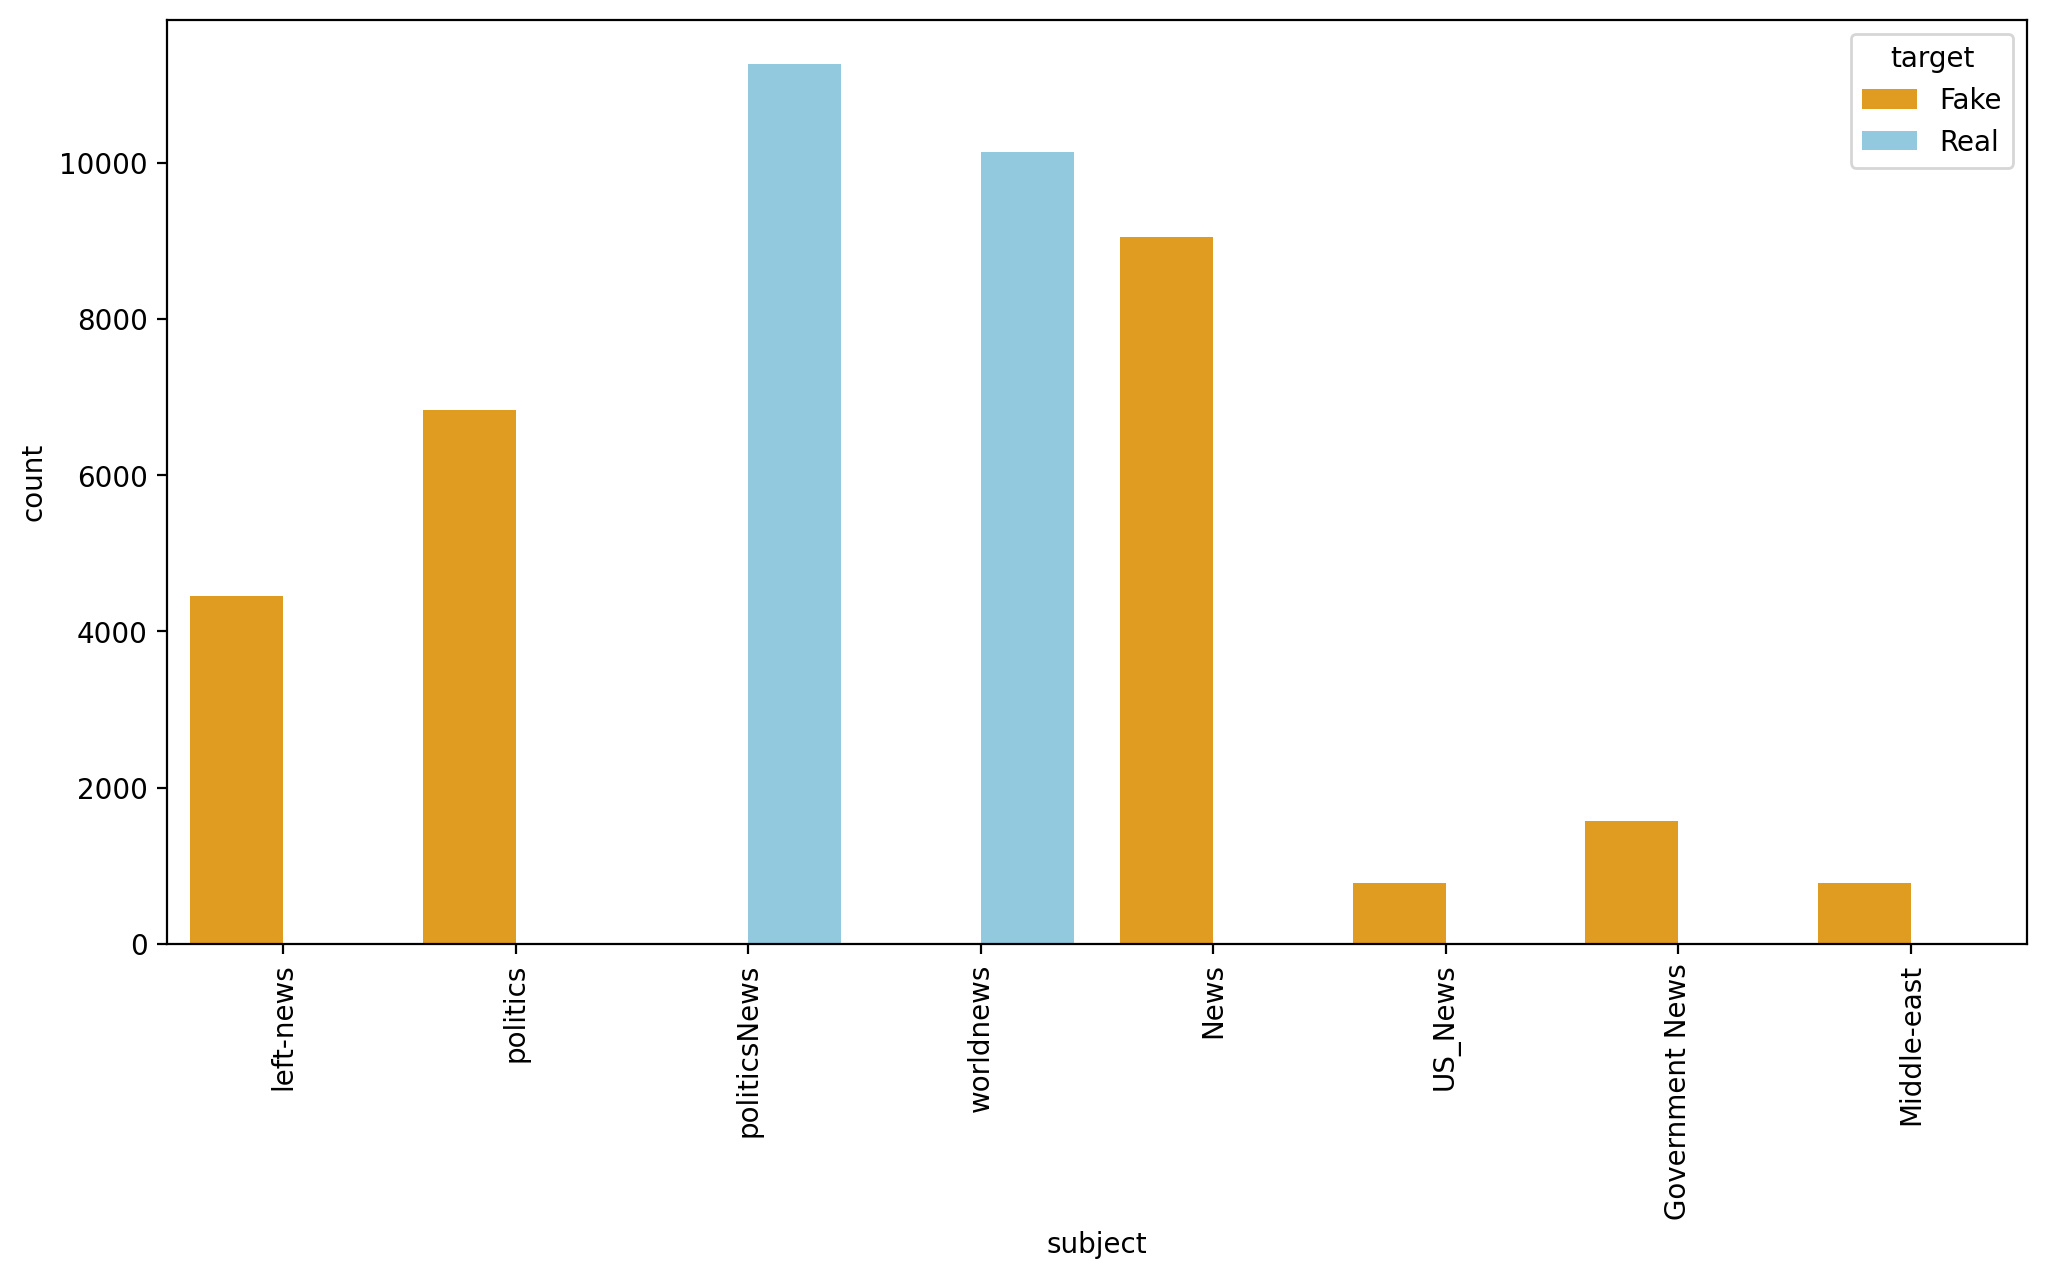

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(x='subject',data=data_isot,hue='target', palette=colors)
plt.xticks(rotation=90)
plt.show()

In [18]:
data_isot.isnull().sum()

title       0
text        0
subject     0
date       10
target      0
dtype: int64

In [19]:
def plot_histogram_with_percentage(df, column, height=10, width=10):
    # Convert the column to categorical type
    df[column] = df[column].astype('str')
    count = df[column].value_counts()
    percentage = count / df[column].count() * 100
    fig, ax = plt.subplots(figsize=(width, height))
    ax.bar(count.index, count.values)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    for i, p in enumerate(percentage):
        ax.text(count.index[i], count.values[i], f"{p:.2f}%")
    plt.show()

In [20]:
data_isot['target'].value_counts()

Fake    23481
Real    21417
Name: target, dtype: int64

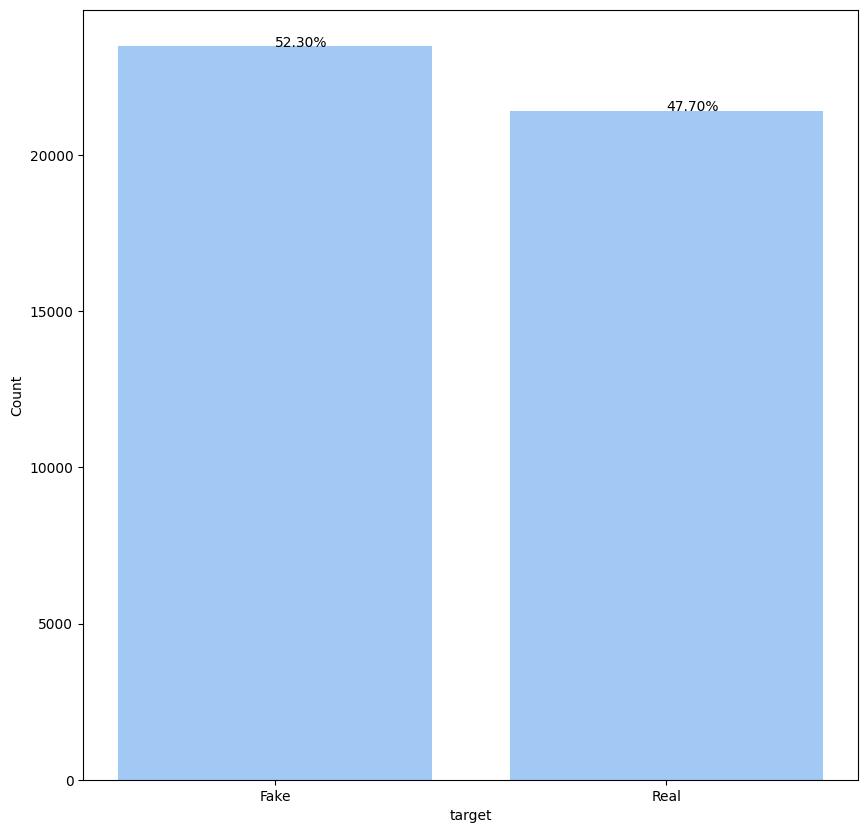

In [21]:

plot_histogram_with_percentage(data_isot,'target')

In [22]:
data_isot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   target   44898 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.7+ MB


In [ ]:
## date is object so convert it into datetime to check the timings of these news.

In [23]:
data_isot['date_time'] = pd.to_datetime(data_isot['date'],errors='coerce')

In [24]:
data_isot['month'] = pd.DatetimeIndex(data_isot['date_time']).month
data_isot['year'] = pd.DatetimeIndex(data_isot['date_time']).year

In [25]:
data_isot.head(2)

,title,text,subject,date,target,date_time,month,year
0,LEFTISTS CALL FOR Ivanka Trump Brand Boycott…T...,Unhinged leftists are calling for a boycott of...,left-news,2016-11-26,Fake,2016-11-26,11.0,2016.0
1,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,politics,2015-04-06,Fake,2015-04-06,4.0,2015.0


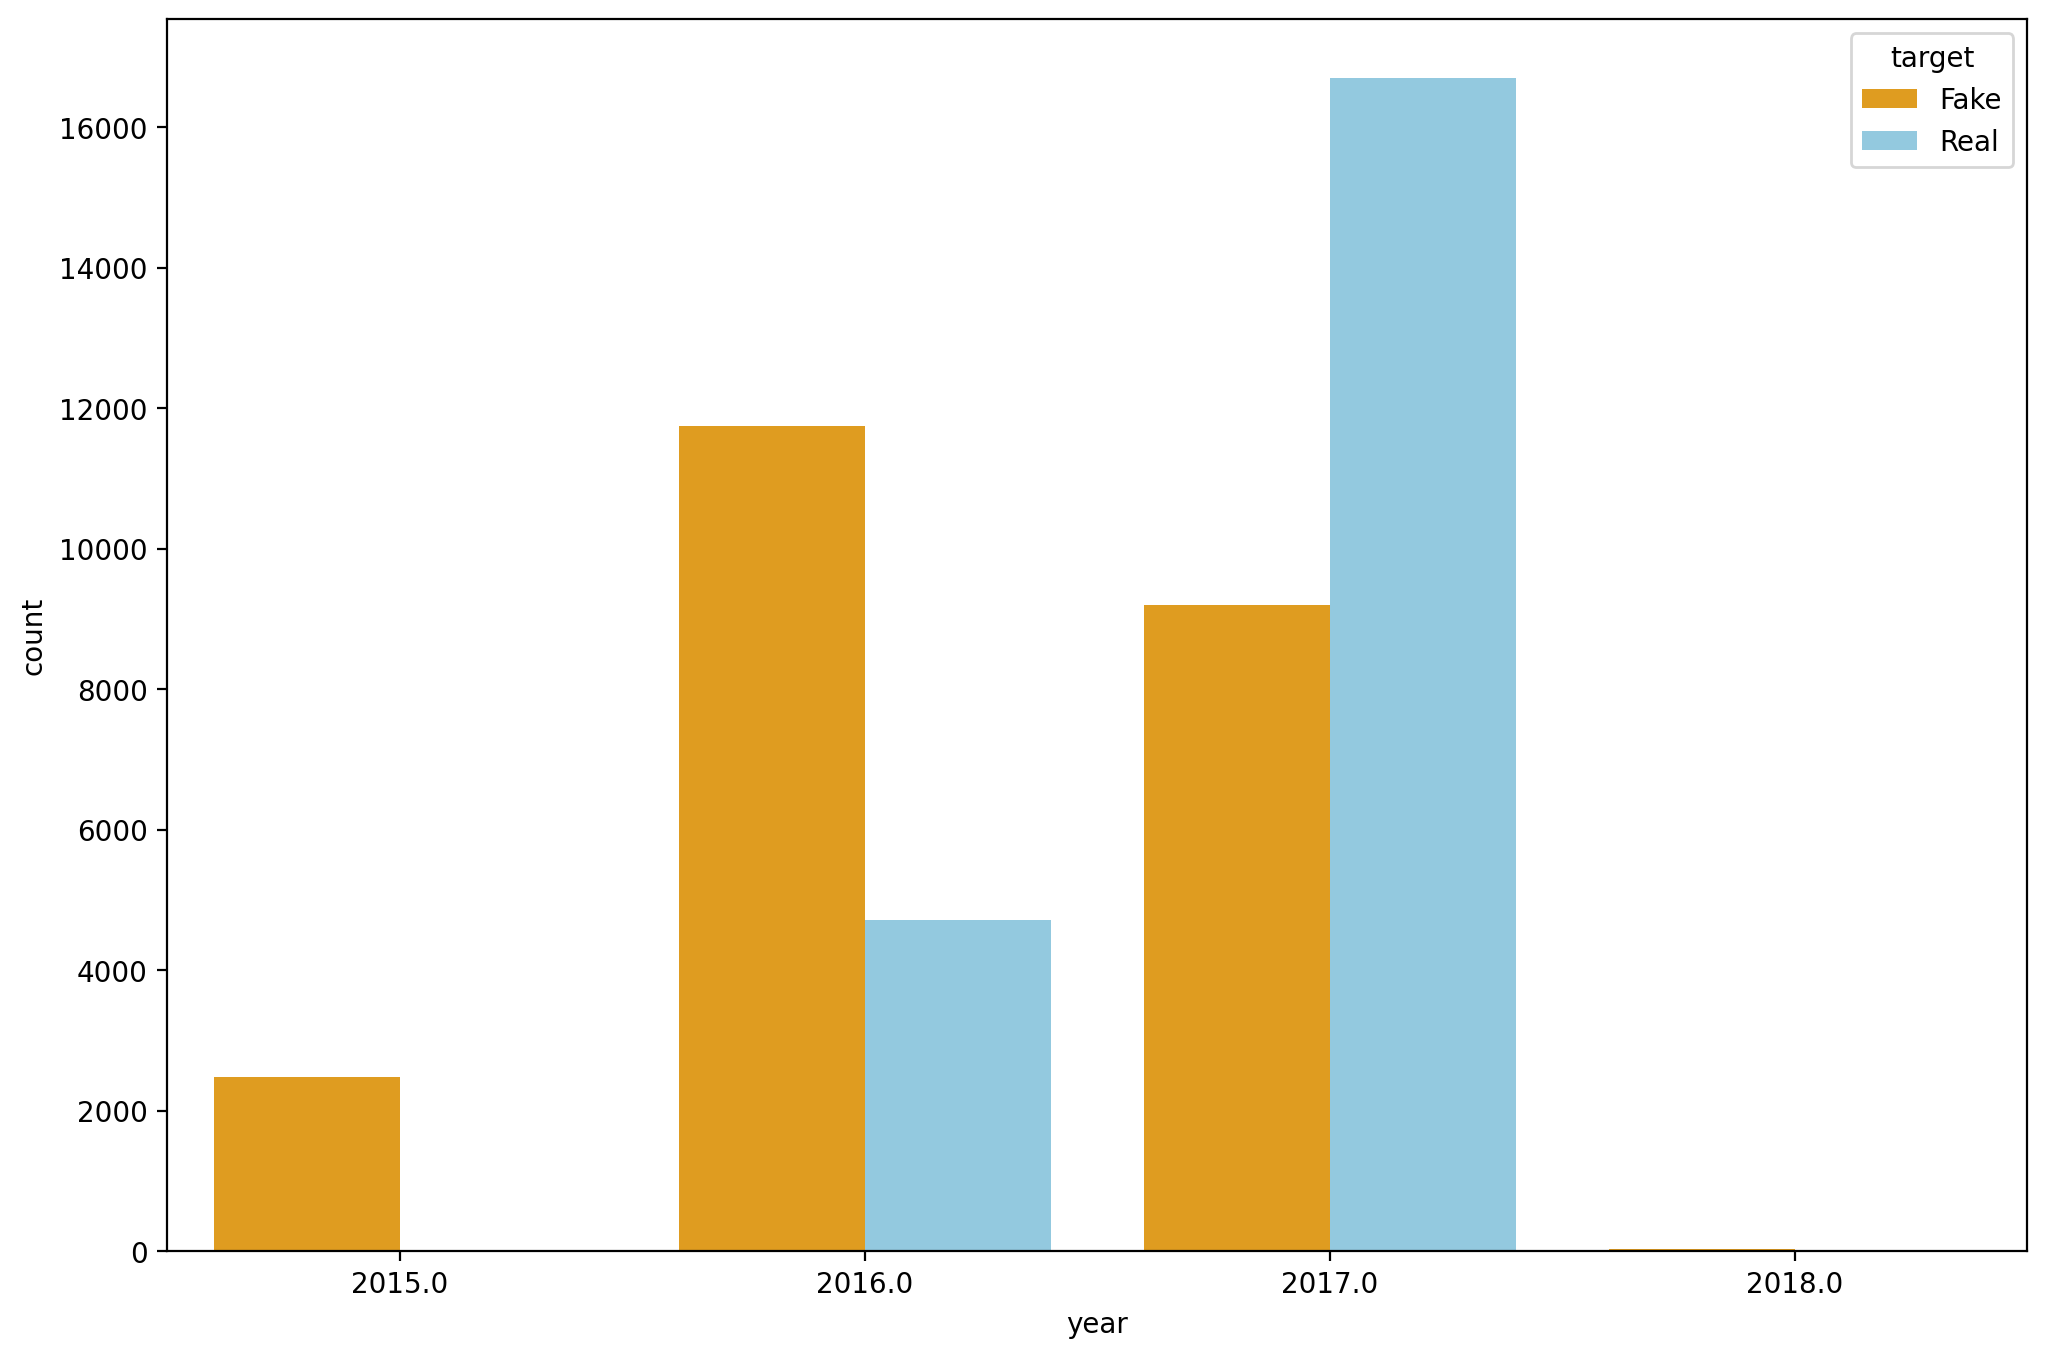

In [34]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(x='year',data=data_isot,hue='target',palette=colors)
plt.show()

### US Presendential Elections in 2016. "The first of these presidential debates took place on September 26, 2016, and set the record as the most-watched debate in American history, with 84 million viewers. The second debate took place on October 9, and the third took place on October 19." (Wikipedia contributors, 2023)

## Wikipedia contributors. (2023, September 22). 2016 United States presidential debates. In Wikipedia, The Free Encyclopedia. Retrieved 23:05, September 30, 2023, from https://en.wikipedia.org/w/index.php?title=2016_United_States_presidential_debates&oldid=1176523462

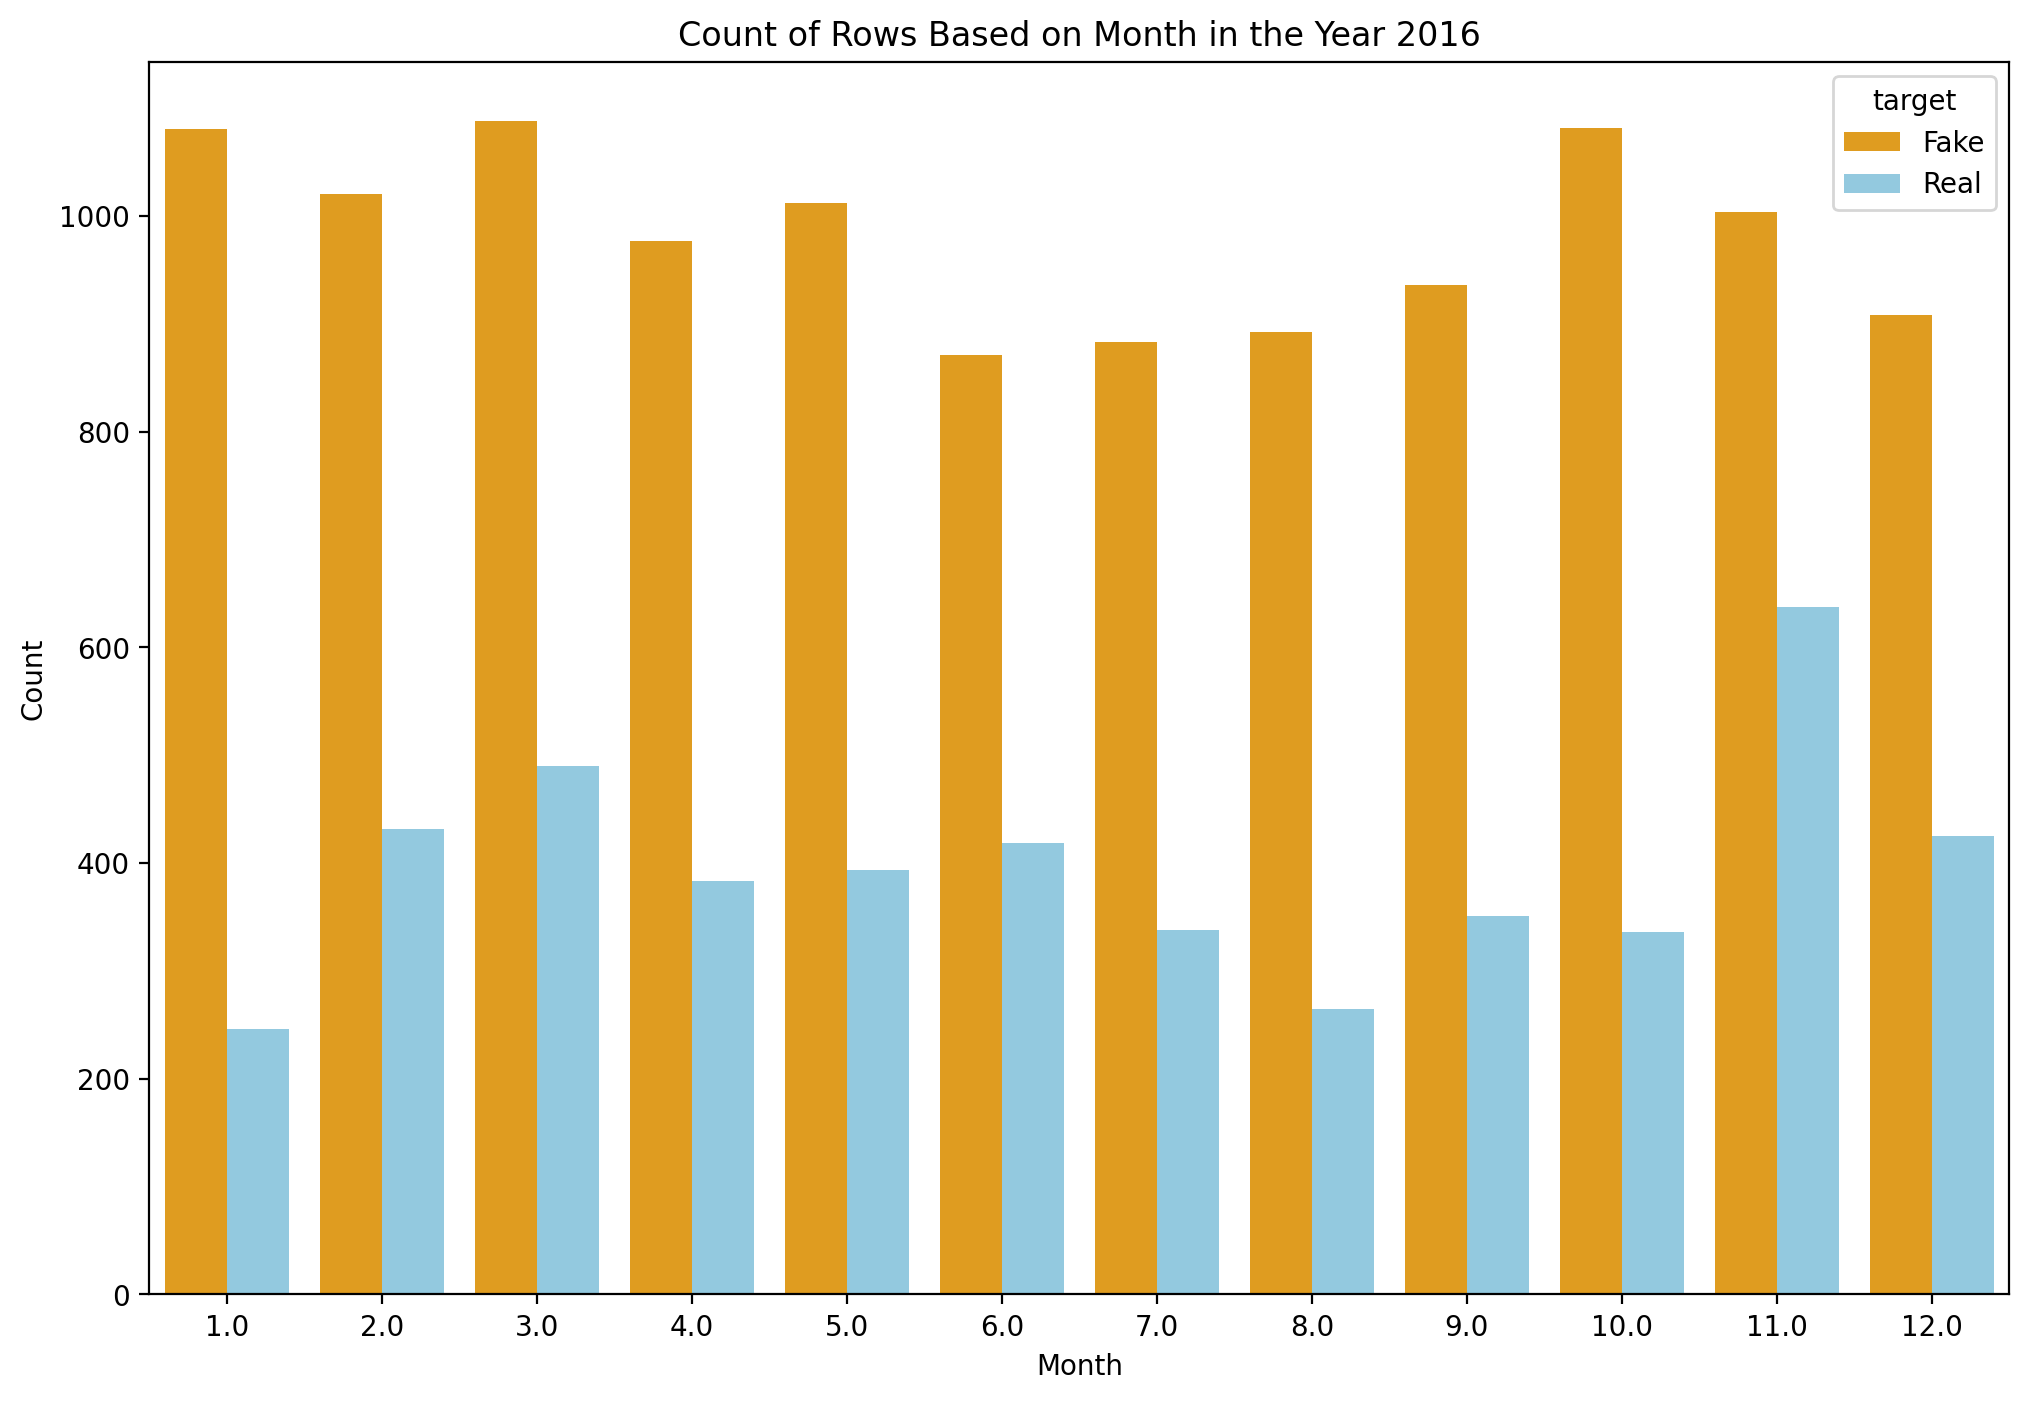

In [30]:
# Assuming 'date' column is in datetime format
data_isot['date'] = pd.to_datetime(data_isot['date'], errors='coerce')

# Filter rows for the year 2016
data_2016 = data_isot[data_isot['date'].dt.year == 2016]

# Define colors for 'Fake' and 'Real' news
colors = {'Fake': 'orange', 'Real': 'skyblue'}


# Create a count plot based on the month
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(x='month', data=data_2016, hue='target', palette=colors)
plt.title('Count of Rows Based on Month in the Year 2016')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

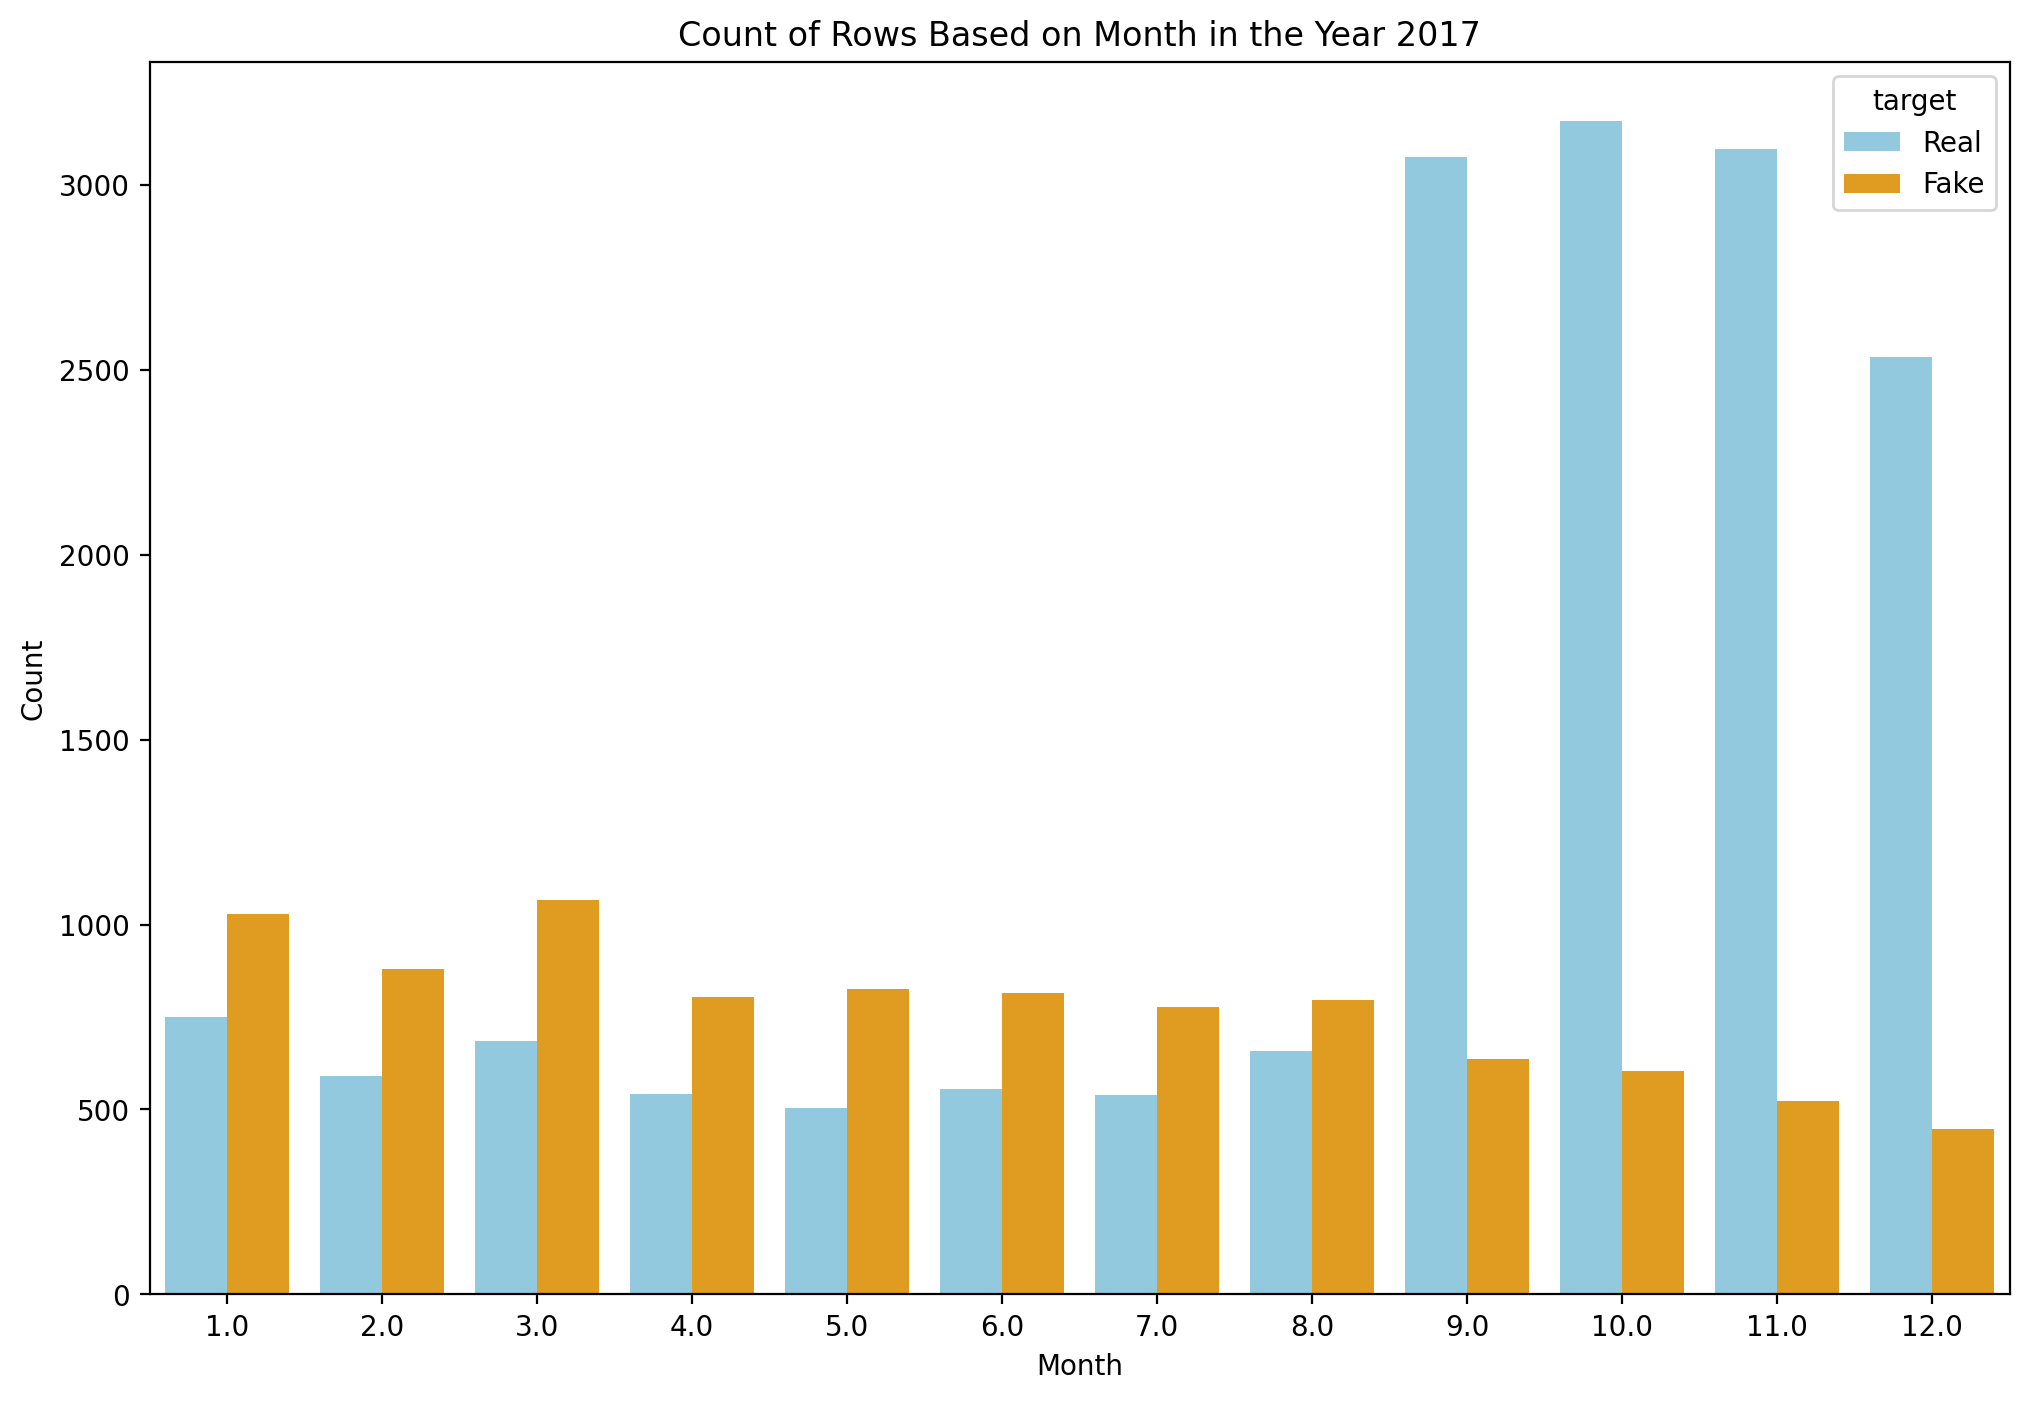

In [31]:
# Assuming 'date' column is in datetime format
data_isot['date'] = pd.to_datetime(data_isot['date'], errors='coerce')

# Filter rows for the year 2017
data_2017 = data_isot[data_isot['date'].dt.year == 2017]

# Define colors for 'Fake' and 'Real' news
colors = {'Fake': 'orange', 'Real': 'skyblue'}

# Create a count plot based on the month
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(x='month', data=data_2017, hue='target', palette=colors)
plt.title('Count of Rows Based on Month in the Year 2017')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [35]:
data_isot.columns

Index(['title', 'text', 'subject', 'date', 'target', 'date_time', 'month',
       'year'],
      dtype='object')

In [36]:
data_isot = data_isot.drop(columns=['subject', 'date', 'date_time', 'month', 'year'])
data_isot.head(2)

,title,text,target
0,LEFTISTS CALL FOR Ivanka Trump Brand Boycott…T...,Unhinged leftists are calling for a boycott of...,Fake
1,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,Fake


In [37]:
def check_same_text(df, text, label):

    # Group by Text and count the labels
    counts = df.groupby(text)[label].value_counts().unstack(fill_value=0)

    '''Create a new DataFrame where you keep one row for each unique text based on the following rules:
    If the number of 'Fake' labels is higher, keep one row with 'Fake.'
    If the number of 'Real' labels is higher, keep one row with 'Real.'
    If the counts are equal, discard all rows with that text.'''

    # Function to determine the majority label for each text
    def majority_label(row):
        rowtext = row[text]
        if counts.loc[rowtext]['Fake'] > counts.loc[rowtext]['Real']:
            return 'Fake'
        elif counts.loc[rowtext]['Real'] > counts.loc[rowtext]['Fake']:
            return 'Real'
        else:
            return None

    # Apply the majority_label function to each row
    df['Majority_Label'] = df.apply(majority_label, axis=1)
    # Filter rows based on the majority label
    filtered_df = df.drop_duplicates(subset=[text, 'Majority_Label'])
    # drop all rows that contain 'None'
    filtered_df = filtered_df.dropna()
    # Remove the 'Majority_Label' column if not needed
    filtered_df = filtered_df.drop(columns=[label])
    filtered_df = filtered_df.rename(columns={"Majority_Label": "target"})
    # Reset the index
    filtered_df = filtered_df.reset_index(drop=True)

    #print(filtered_df)

    return filtered_df

### Delete all the redundant rows, if the number of labels of Fake and Real are equal. If Fake label count is higher in the number of redundant rows, keep one row and mark it as Fake, Same for Real label count.

In [38]:
data_isot = check_same_text(data_isot, 'text','target' )

In [39]:
data_isot.head(2)

,title,text,target
0,LEFTISTS CALL FOR Ivanka Trump Brand Boycott…T...,Unhinged leftists are calling for a boycott of...,Fake
1,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,Fake


In [40]:
data_isot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38646 entries, 0 to 38645
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   38646 non-null  object
 1   text    38646 non-null  object
 2   target  38646 non-null  object
dtypes: object(3)
memory usage: 905.9+ KB


In [41]:
44898-38646

6252

### 6252 Redundant rows in ISOT dataset

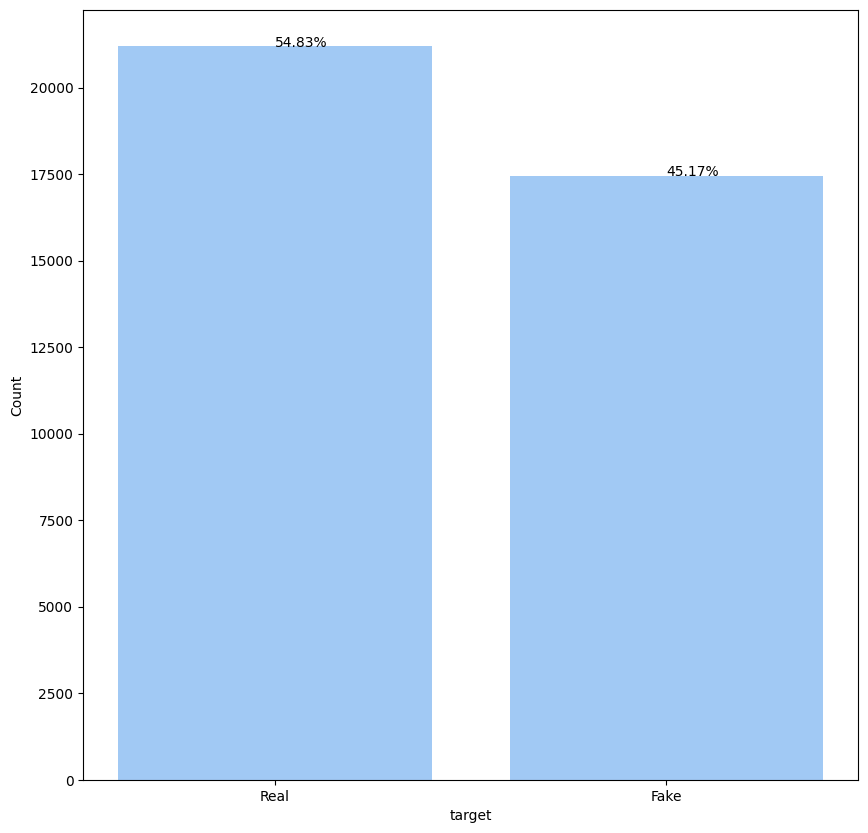

In [42]:
plot_histogram_with_percentage(data_isot,'target')

In [ ]:
from google.colab import files

# Dataset was saved to Shared Google Drive on 9/27/2023

## Use this to save dataset to CSV
# merged_df.to_csv('merged_dataset.csv')
# files.download('merged_dataset.csv')

In [ ]:
#data_isot.to_csv('ISOTData_redundaciesRemoved.csv', index=False)
#files.download('ISOTData_redundaciesRemoved.csv')

## GET_REAL_WITH_FAKE Dataset


Info: https://opendatascience.com/how-to-build-a-fake-news-classification-model/

Source: https://github.com/GeorgeMcIntire/fake_real_grafn_df

Using this version of "Getting Real about Fake News dataset" because it's balanced with real news. The original is just fake news and was put out by Kaggle.

Original source: https://www.kaggle.com/datasets/mrisdal/fake-news

In [43]:
# Read in Getting Real about Fake News dataset from Google Drive folder
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1qQuqE3ab36NiY1vo8qJ1FHjN-0hrY3oj'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
getting_real = pd.read_csv('file.csv')

#getting_real = pd.read_csv('fake_and_real_news_dataset.csv')

In [44]:
getting_real.head()

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


In [45]:
getting_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idd     4594 non-null   object
 1   title   4593 non-null   object
 2   text    4594 non-null   object
 3   label   4594 non-null   object
dtypes: object(4)
memory usage: 143.7+ KB


In [46]:
getting_real=getting_real.drop(columns=['idd'])
getting_real.head()

,title,text,label
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


In [47]:
getting_real['label'].value_counts()

REAL    2297
FAKE    2297
Name: label, dtype: int64

In [48]:
getting_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4593 non-null   object
 1   text    4594 non-null   object
 2   label   4594 non-null   object
dtypes: object(3)
memory usage: 107.8+ KB


In [49]:
getting_real['label'].dtype

dtype('O')

In [50]:
getting_real['label'] = getting_real['label'].astype('category')

In [51]:
getting_real['label'] = getting_real['label'].cat.rename_categories({'REAL': 'Real', 'FAKE': 'Fake'})


In [52]:
getting_real = getting_real.rename(columns={"label": "target"})

In [53]:
getting_real.head()

,title,text,target
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,Real
1,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,Real
2,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",Real
3,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,Real
4,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,Real


In [54]:
getting_real = getting_real.sample(frac=1).reset_index(drop=True)
getting_real.head(2)

,title,text,target
0,Will minimum wage hikes lead to a huge boost i...,As states like California and cities like Seat...,Real
1,Trump RNC manager: 'Winning isn't enough',"""This is an example of Donald Trump managing, ...",Real


In [55]:
getting_real.isnull().sum()

title     1
text      0
target    0
dtype: int64

In [56]:
null_mask = getting_real.isnull().any(axis=1)
null_rows = getting_real[null_mask]

print(null_rows)

     title                                               text target
1046   NaN  A verdict in 2017 could have sweeping conseque...   Real


In [57]:
getting_real = getting_real.dropna()
getting_real.isnull().sum()

title     0
text      0
target    0
dtype: int64

In [58]:
getting_real.shape

(4593, 3)

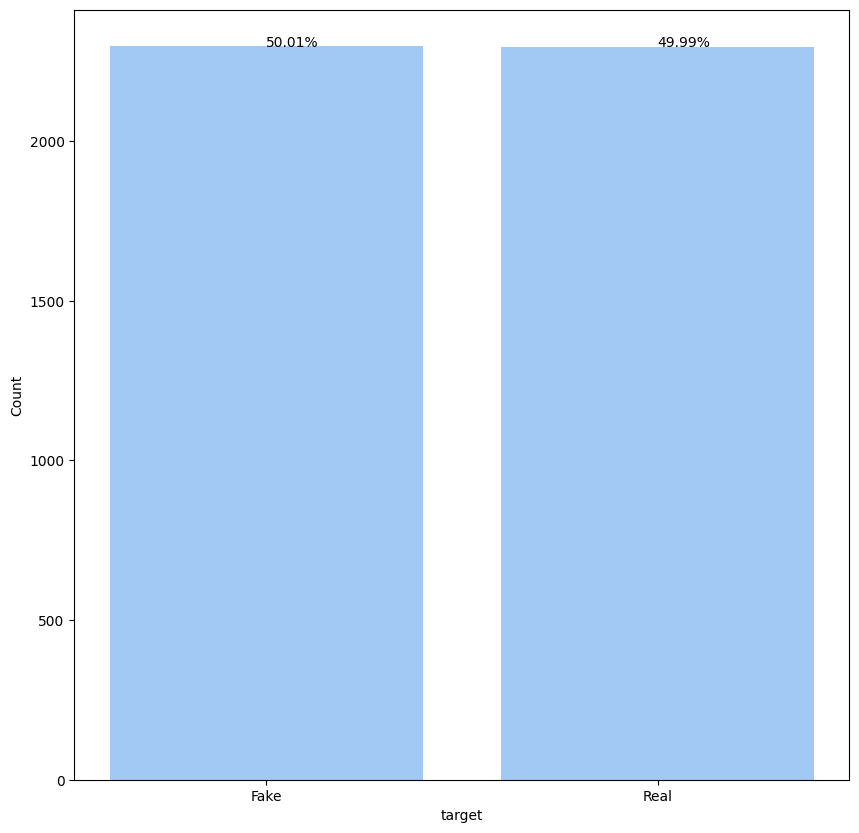

In [ ]:
plot_histogram_with_percentage(getting_real,'target')


In [59]:
getting_real = check_same_text(getting_real, 'text','target' )

In [60]:
getting_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4409 non-null   object
 1   text    4409 non-null   object
 2   target  4409 non-null   object
dtypes: object(3)
memory usage: 103.5+ KB


In [61]:
4594- 4409

185

### 185 redundant rows from Getting_real dataset

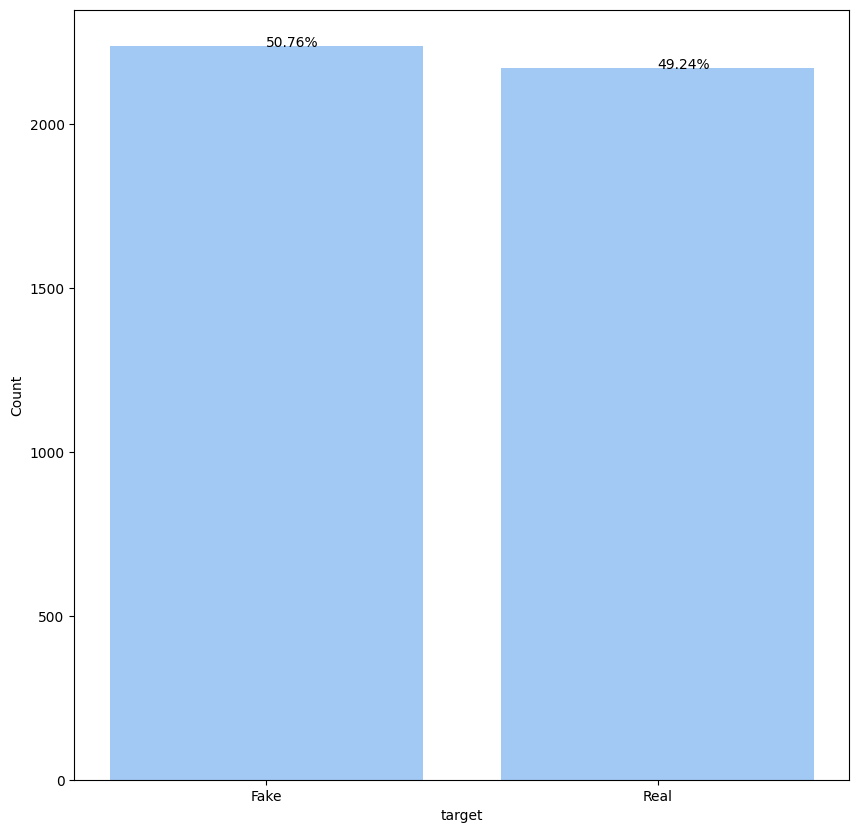

In [ ]:
plot_histogram_with_percentage(getting_real,'target')

In [ ]:
#getting_real.to_csv('GettingRealData_redundaciesRemoved.csv',index=False)
#files.download('GettingRealData_redundaciesRemoved.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## BUZZFEEED and POLITIFACTS

In [ ]:
# # Read in BuzzFake - Fake news dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1JtTLWzpdt9COWGb9WB2yXdX6QMvkYbcp'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
buzz = pd.read_csv('file.csv')

In [ ]:
# # Read in BuzzReal- Fake news dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1O7WrI9xJgTUdgBzMJ35JeLD8Vv5Mm0P_'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
buzz_r = pd.read_csv('file.csv')

In [ ]:
# # Read in Politco fake - Fake news dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1tuMZy4gL4Nhc4NfDHmYTqnuP_rak23-m'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
pol = pd.read_csv('file.csv')

In [ ]:
# # Read in Politco Real - Fake news dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '17fDm4AHpHR1UUZVlG6OXHuBRFStVHry4'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
pol_r = pd.read_csv('file.csv')

In [ ]:
#buzz = pd.read_csv('BuzzFeed_fake_news_content.csv')
#buzz_r = pd.read_csv('BuzzFeed_real_news_content.csv')
#pol = pd.read_csv('PolitiFact_fake_news_content.csv')
#pol_r = pd.read_csv('PolitiFact_real_news_content.csv')

In [ ]:
buzz.head(2)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."


In [ ]:
buzz_r.head(2)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."


In [ ]:
pol.tail(2)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
118,Real_98-Webpage,Don King drops N-word while introducing Donald...,Story highlights Trump was sitting in a chair ...,http://cnn.it/2dh5vq9,http://i2.cdn.cnn.com/cnnnext/dam/assets/16092...,Jeremy Diamond,http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/12102...,http://www.cnn.com/2016/09/21/politics/don-kin...,"{""description"": ""The controversial boxing prom..."
119,Real_99-Webpage,Donald Trump Jr. Compares Syrian Refugees to S...,"Donald Trump Jr., a son of the Republican pres...",http://abcn.ws/2cFVuaq,http://a.abcnews.com/images/Politics/AP_donald...,Abc News,http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-jr...,"{""fb_title"": ""Trump Jr. Compares Syrian Refuge..."


In [ ]:
pol_r.tail(2)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
118,Real_98-Webpage,Don King drops N-word while introducing Donald...,Story highlights Trump was sitting in a chair ...,http://cnn.it/2dh5vq9,http://i2.cdn.cnn.com/cnnnext/dam/assets/16092...,Jeremy Diamond,http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/12102...,http://www.cnn.com/2016/09/21/politics/don-kin...,"{""description"": ""The controversial boxing prom..."
119,Real_99-Webpage,Donald Trump Jr. Compares Syrian Refugees to S...,"Donald Trump Jr., a son of the Republican pres...",http://abcn.ws/2cFVuaq,http://a.abcnews.com/images/Politics/AP_donald...,Abc News,http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-jr...,"{""fb_title"": ""Trump Jr. Compares Syrian Refuge..."


In [ ]:
buzz.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
buzz_r.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
pol.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
pol_r.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

**Delete unnecessary columns**

In [ ]:
buzz = buzz.drop(columns=['id','url', 'top_img', 'authors', 'source','publish_date', 'movies', 'images', 'canonical_link', 'meta_data'])
buzz_r = buzz_r.drop(columns=['id','url', 'top_img', 'authors', 'source','publish_date', 'movies', 'images', 'canonical_link', 'meta_data'])
pol = pol.drop(columns=['id','url', 'top_img', 'authors', 'source','publish_date', 'movies', 'images', 'canonical_link', 'meta_data'])
pol_r = pol_r.drop(columns=['id','url', 'top_img', 'authors', 'source','publish_date', 'movies', 'images', 'canonical_link', 'meta_data'])

In [ ]:
buzz.shape,buzz_r.shape,pol.shape,pol_r.shape

((91, 2), (91, 2), (120, 2), (120, 2))

In [ ]:
buzz['target'] = 'Fake'
buzz_r['target'] = 'Real'
buzz_r.head(2)

,title,text,target
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,Real


In [ ]:
buzz = buzz.append(buzz_r).sample(frac=1).reset_index().drop(columns=['index'])
buzz.shape

<ipython-input-70-841378ab5c98>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buzz = buzz.append(buzz_r).sample(frac=1).reset_index().drop(columns=['index'])


(182, 3)

In [ ]:
buzz.head(2)

,title,text,target
0,"Georgia poll: Donald Trump, Hillary Clinton in...","Story highlights Trump has 45%, Clinton 42% an...",Real
1,"‘We Don’t Adapt To Your Culture, You Adapt To ...",America needs to get with the program when it ...,Fake


In [ ]:
buzz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   182 non-null    object
 1   text    182 non-null    object
 2   target  182 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


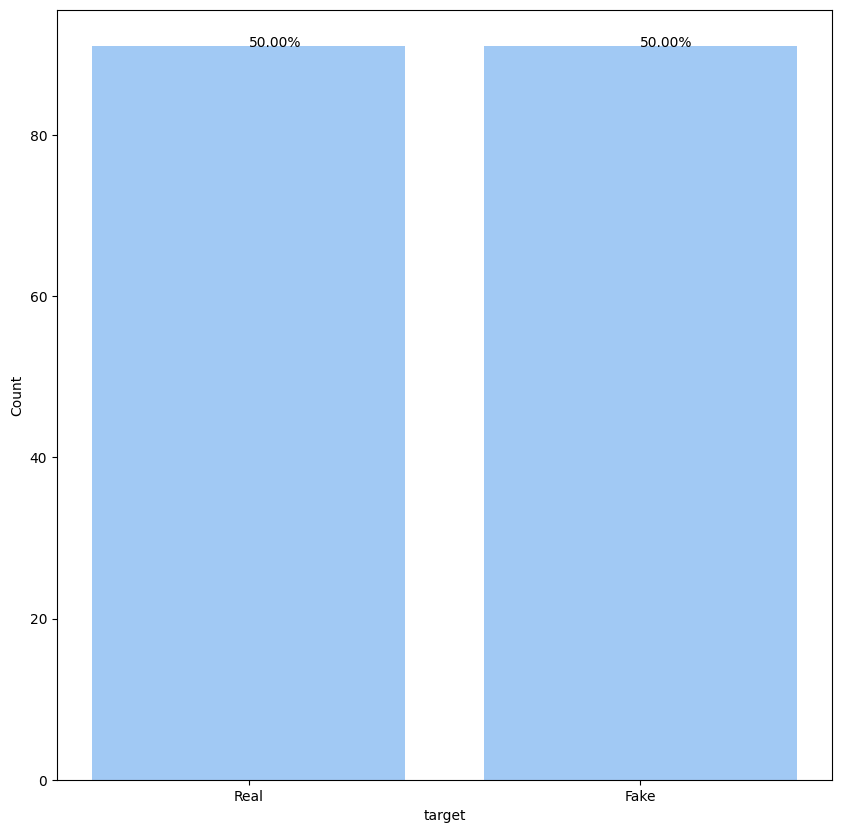

In [ ]:
plot_histogram_with_percentage(buzz,'target')

In [ ]:
buzz = check_same_text(buzz, 'text','target' )

In [ ]:
buzz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   178 non-null    object
 1   text    178 non-null    object
 2   target  178 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [ ]:
182-178

4

## 4 Redundant Buzzfeed rows

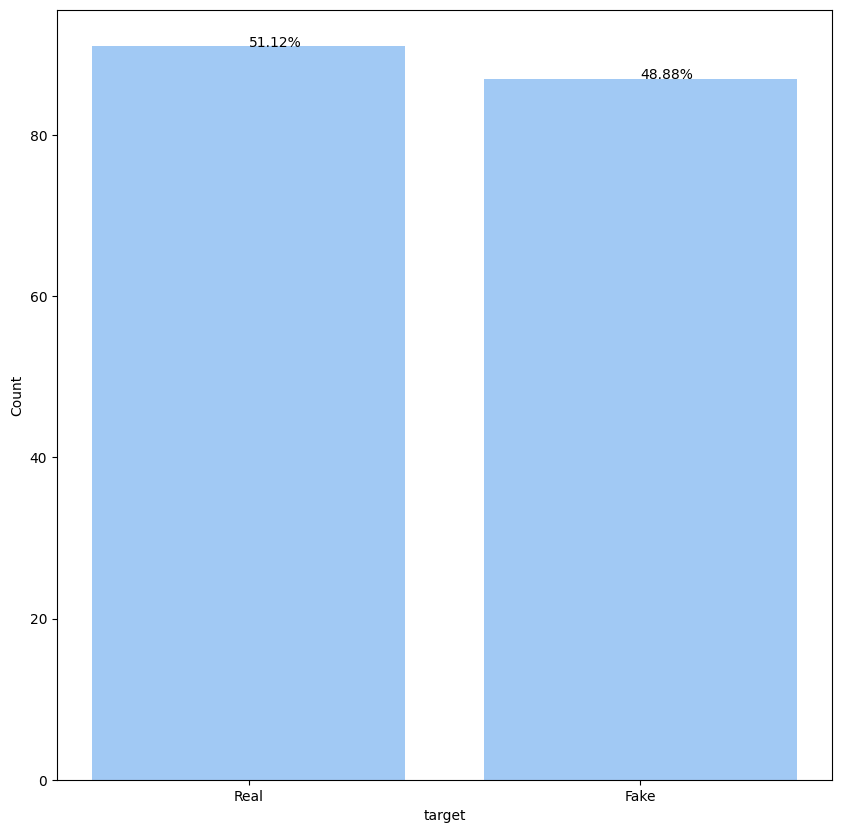

In [ ]:
plot_histogram_with_percentage(buzz,'target')

#### PolitiFacts

In [ ]:
pol['target'] = 'Fake'
pol_r['target'] = 'Real'

In [ ]:
pol.head(2)

,title,text,target
0,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,Fake
1,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,Fake


In [ ]:
pol_r.head(2)

,title,text,target
0,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,Real
1,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,Real


In [ ]:
pol = pol.append(pol_r).sample(frac=1).reset_index().drop(columns=['index'])
pol.shape

<ipython-input-81-f626f32febef>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pol = pol.append(pol_r).sample(frac=1).reset_index().drop(columns=['index'])


(240, 3)

In [ ]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   240 non-null    object
 1   text    240 non-null    object
 2   target  240 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


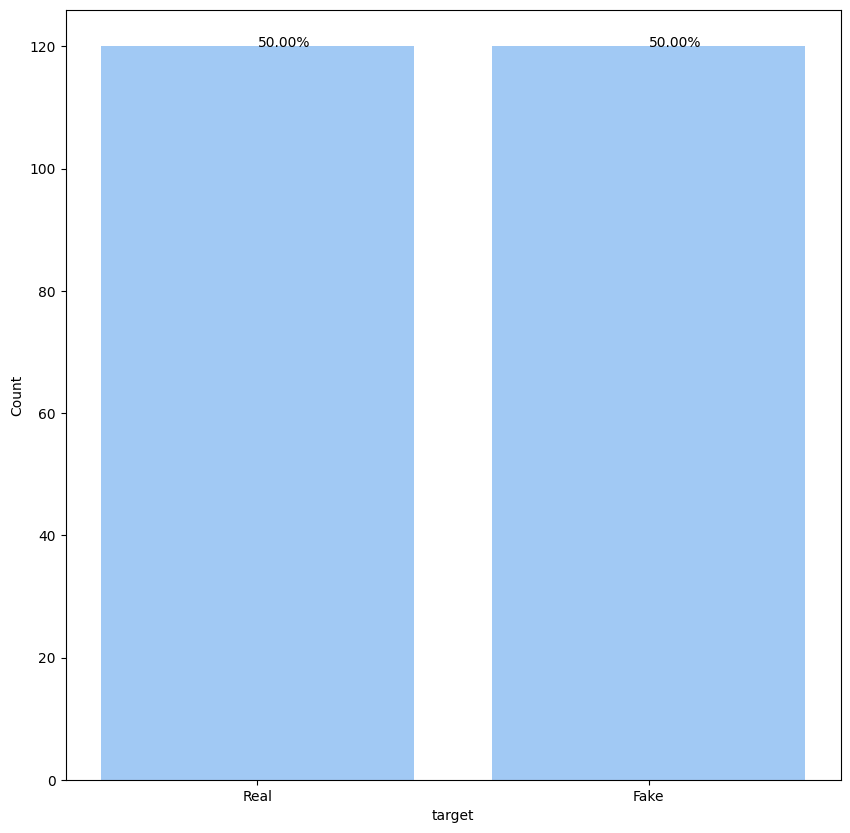

In [ ]:
plot_histogram_with_percentage(pol,'target')

In [ ]:
pol = check_same_text(pol, 'text','target' )

In [ ]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   0 non-null      object
 1   text    0 non-null      object
 2   target  0 non-null      object
dtypes: object(3)
memory usage: 124.0+ bytes


In [ ]:
#plot_histogram_with_percentage(pol,'target')

### ALL the Rows of FAKE and REAL texts are exactly the same, resulting in 0 rows in dataframe after similarity check. This dataset cannot be relied upon. Therefore, will not merge PolitiFacts and Buzz Datasets(Buzz also came along with PolitiFacts dataset so cannot be relied upon).

### We have removed redundancies and null values from the datasets. We can merge ISOT and GET_REAL_WITH_FAKE Datasets now.

In [ ]:
data_isot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38646 entries, 0 to 38645
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   38646 non-null  object
 1   text    38646 non-null  object
 2   target  38646 non-null  object
dtypes: object(3)
memory usage: 905.9+ KB


In [ ]:
getting_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4409 non-null   object
 1   text    4409 non-null   object
 2   target  4409 non-null   object
dtypes: object(3)
memory usage: 103.5+ KB


## Merging dataframes

In [62]:
merged_data = pd.concat([data_isot, getting_real], axis=0)
merged_data.head(2)

,title,text,target
0,LEFTISTS CALL FOR Ivanka Trump Brand Boycott…T...,Unhinged leftists are calling for a boycott of...,Fake
1,(VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...,What an evil bunch of freaks! The agenda is so...,Fake


In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43055 entries, 0 to 4408
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43055 non-null  object
 1   text    43055 non-null  object
 2   target  43055 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
38646+4409 # the sum of the number of rows in each matches with the merged_data

43055

In [ ]:
merged_data = merged_data.sample(frac=1).reset_index(drop=True)
merged_data

,title,text,target
0,"Erdogan, Putin to discuss Syrian peace plan ne...",ISTANBUL (Reuters) - Turkish President Tayyip ...,Real
1,Comment on Guess what happened in Chiraq this ...,"Posted on November 1, 2016 by DCG | 1 Comment ...",Fake
2,Trump Just Went Full Hypocrite On National Pa...,Donald Trump is a hypocrite and even conservat...,Fake
3,OOPS! Media Forgot Ted Kennedy Asked Russia To...,In 1991 a reporter for the London Times found ...,Fake
4,JUDGE JEANINE PIRRO Rips Into The Trump Rally ...,We love Judge Jeanine s take on everything but...,Fake
...,...,...,...
43050,BOILER ROOM – EP #56 – Pharmacological Nightmare,Tune in to the Alternate Current Radio Network...,Fake
43051,They Fought And Died To Protect Total STRANGER...,This is a brilliantly written piece by Nick Sh...,Fake
43052,Trump should stop attacking minority groups: S...,WASHINGTON (Reuters) - Presumptive Republican ...,Real
43053,Watch Obama Call Donald Trump Out On His Bull...,"When watching Donald Trump speak, you d think ...",Fake


In [ ]:
dft = merged_data[(merged_data['target'] == '')]
dft

,title,text,target


In [ ]:
unique_values = merged_data["target"].unique()
unique_values

array(['Real', 'Fake'], dtype=object)

In [ ]:
for value in unique_values:
    if value not in ["Real", "Fake"]:
        print(f"Found an invalid value in 'target': {value}")

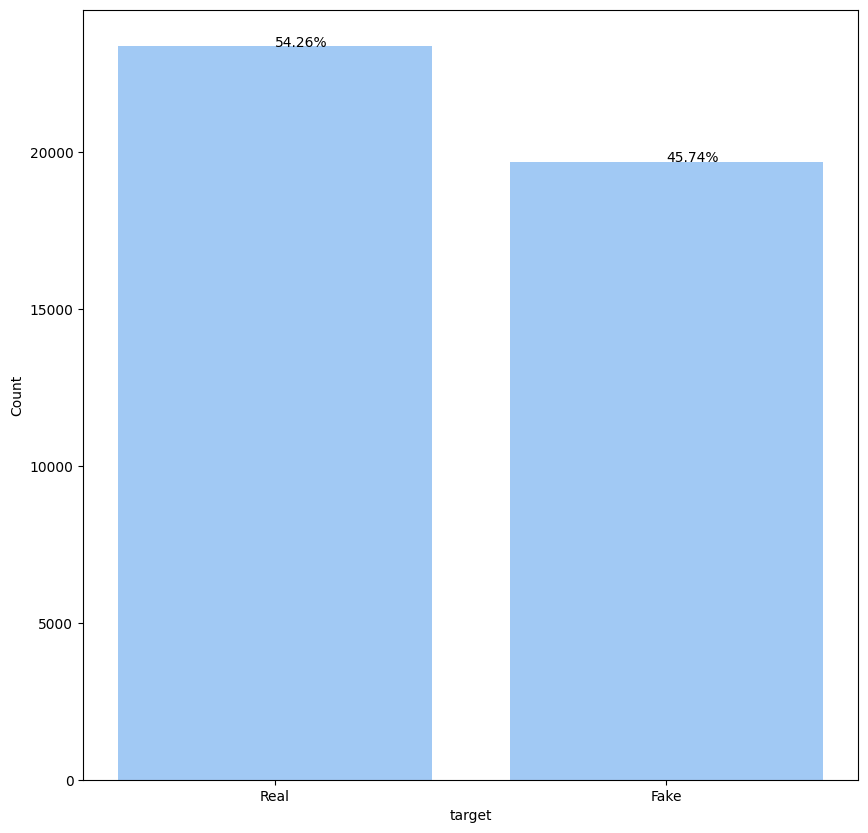

In [ ]:
plot_histogram_with_percentage(merged_data,'target')

In [ ]:
merged_data.to_csv('mergedData.csv')
files.download('mergedData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Basic Data Cleaning

In [ ]:
# # Read in the merged dataset
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1NH9Ll58DRdae79AxClUS7TvfhZOUyjJG'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df = pd.read_csv('file.csv', index_col=0)

In [ ]:
df.head(2)

,title,text,target
0,"Turkish, Sudanese intelligence agencies catch ...",ANKARA (Reuters) - Turkish and Sudanese intell...,Real
1,Supreme Court denies stay request in North Car...,(Reuters) - The U.S. Supreme Court on Friday r...,Real


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43055 entries, 0 to 43054
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43055 non-null  object
 1   text    43055 non-null  object
 2   target  43055 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


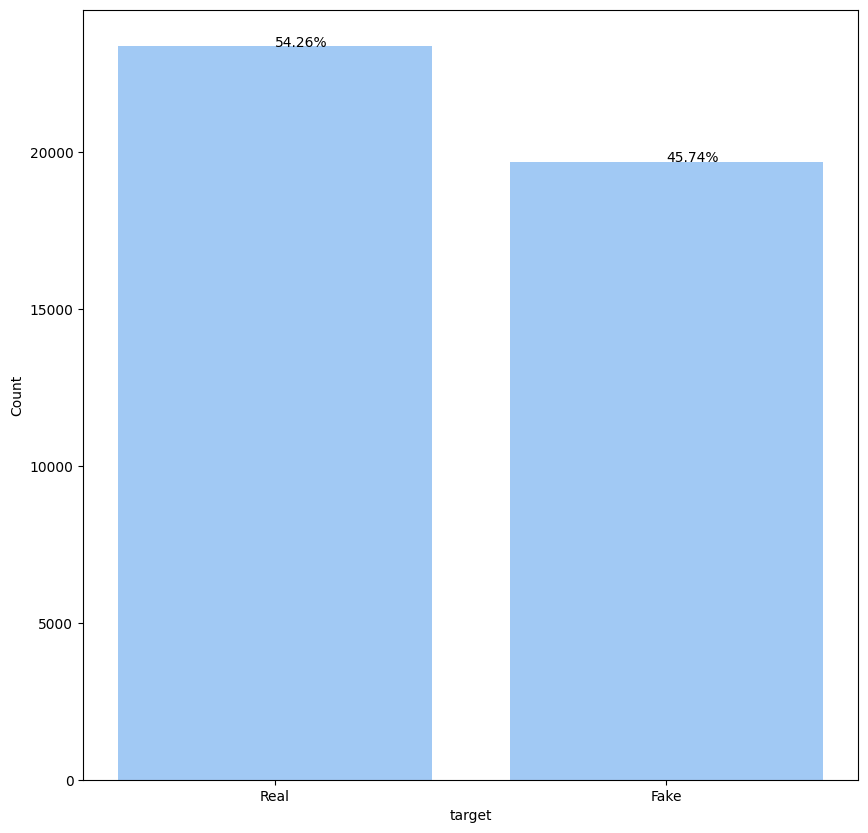

In [ ]:
plot_histogram_with_percentage(df,'target')

In [ ]:

df['target'].value_counts()

Real    23362
Fake    19693
Name: target, dtype: int64

## For now we will focus on Text only. May process Titles later.

In [ ]:
df = df.drop(columns=['title'])
df.head(2)

,text,target
0,ANKARA (Reuters) - Turkish and Sudanese intell...,Real
1,(Reuters) - The U.S. Supreme Court on Friday r...,Real


### Before Proceeding with balancing the dataset we need to perform basic cleaning
### so that the final data can be augmented and vectorized to be fed to models.

In [ ]:
import re
import time
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import math
from wordcloud import WordCloud
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#### Removing HTML tags,punctuations,special characters etc using regular expressions.
TAG_RE = re.compile(r'<[^>]+>') # match anything in the tag <...>

def remove_tags(text):
    #print(text)
    return TAG_RE.sub('', text) # replace that tag with a null string

def process_text(sen):
    #print(sen)
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) # look for any character except a toz or A to Z and replace with space

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # Look for one or more space with any a-z or a-Z letter followed by multiple space and replace with a space

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence) # finally check for continuous space and replace them with a single space

    return sentence

In [ ]:
for row in df.itertuples():
    article = process_text(str(df.loc[row.Index,'text']))
    df.loc[row.Index,'text'] = article

In [ ]:
df.head(20)

,text,target
0,ANKARA Reuters Turkish and Sudanese intelligen...,Real
1,Reuters The S Supreme Court on Friday refused...,Real
2,If there one presidential candidate who is the...,Fake
3,No wonder she didn want anyone to see her spee...,Fake
4,Feel the Bern of lot of gullible young people ...,Fake
5,Donald Trump has been called out by yet anothe...,Fake
6,BANGKOK Reuters Thai court issued arrest warra...,Real
7,CHISINAU Reuters The European Union will not t...,Real
8,Yet another Republican is leaving the party in...,Fake
9,The flags at Citi Field were also at half mast...,Fake


In [ ]:
df.shape[0]

43055

In [ ]:
empty_strings_count = df[df['text'].str.strip() == ''].shape[0]
empty_strings_count

3

In [ ]:
# Removing the rows where the 'text' column has empty strings or strings containing only whitespace
df = df[df['text'].str.strip() != '']



In [ ]:
# Checking the number of remaining rows in the DataFrame
df.shape[0]


43052

***Change the Target [Fake = 1, Real = 0]***

In [ ]:
# Label encoding
df['Fake_rating'] = df['target'].map({'Fake': 1, 'Real': 0})
df.head()

,text,target,Fake_rating
0,ANKARA Reuters Turkish and Sudanese intelligen...,Real,0
1,Reuters The S Supreme Court on Friday refused...,Real,0
2,If there one presidential candidate who is the...,Fake,1
3,No wonder she didn want anyone to see her spee...,Fake,1
4,Feel the Bern of lot of gullible young people ...,Fake,1


In [ ]:
df = df.drop(columns=['target'])
df.head(2)

,text,Fake_rating
0,ANKARA Reuters Turkish and Sudanese intelligen...,0
1,Reuters The S Supreme Court on Friday refused...,0


In [ ]:
df.to_csv('basicCleanData.csv',index=False)
files.download('basicCleanData.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## We should apply Data Augmentation techniques to further balance the data.  The most popular and effective technique is synonym replacement via word embeddings. NLPAug library is utilized for this.

In [ ]:
pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw
from sklearn.model_selection import train_test_split

## Before Data Augmentation, we need to split the data into train, validation and test

In [ ]:
df.head(2)

,text,Fake_rating
0,ANKARA Reuters Turkish and Sudanese intelligen...,0
1,Reuters The S Supreme Court on Friday refused...,0


In [ ]:
# Split the dataset into train, validation, and test sets with stratified sampling
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Fake_rating']) # 10% test, 90% train
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['Fake_rating'])  # 0.1x0.9 = 0.09 (validation set)


In [ ]:
train_df.shape, val_df.shape, test_df.shape

((34871, 2), (3875, 2), (4306, 2))

In [ ]:
train_df.head(2)

,text,Fake_rating
29095,WASHINGTON Reuters The S Senate on Friday back...,0
26758,During the Democratic Presidential Primaries R...,1


In [ ]:
train_df.to_csv('traincleanNMerged.csv', index=False)
val_df.to_csv('valCleanNMerged.csv', index=False)
test_df.to_csv('testCleanNMerged.csv', index=False)

In [ ]:
#train.shape, valid.shape, test.shape

In [ ]:
train_df['Fake_rating']

29095    0
26758    1
24030    1
20769    0
38497    0
        ..
5177     0
24576    1
24395    1
13373    1
35983    1
Name: Fake_rating, Length: 34871, dtype: int64

In [ ]:
# Separate "Real" and "Fake" samples
real_samples = train_df[train_df['Fake_rating'] == 0]
fake_samples = train_df[train_df['Fake_rating'] == 1]

## Word Cloud for Real News

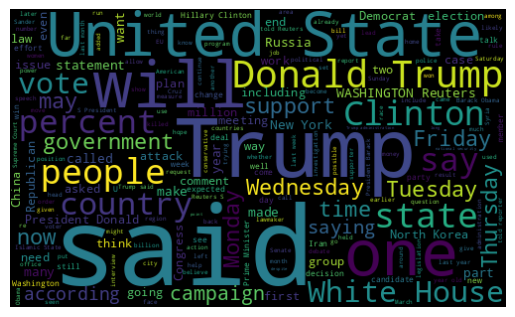

In [ ]:
allWords = ' '.join([text for text in real_samples['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Word Cloud for Fake News

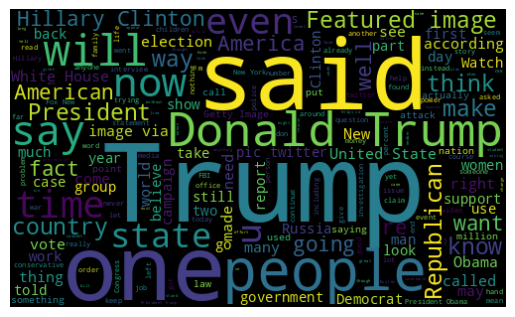

In [ ]:
allWords = ' '.join([text for text in fake_samples['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
train_df['Fake_rating'].value_counts()

0    18922
1    15949
Name: Fake_rating, dtype: int64

In [ ]:
len(real_samples) - len(fake_samples)

2973

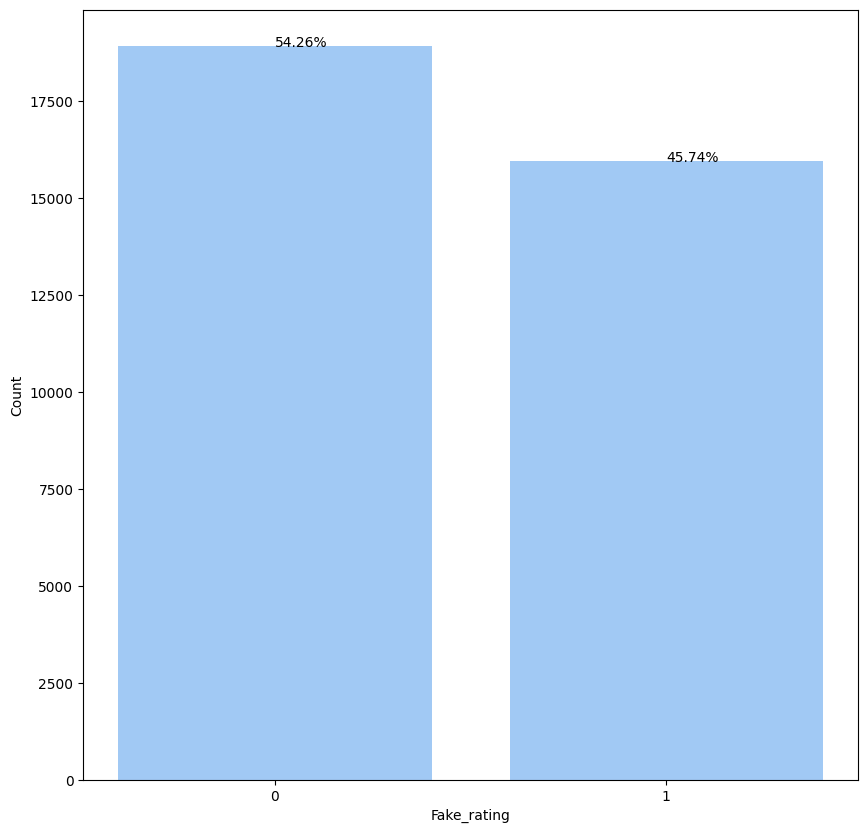

In [ ]:
plot_histogram_with_percentage(train_df,'Fake_rating')

## Using Oversampling Technique

In [ ]:
# Calculate the difference in sample count between "Real" and "Fake" classes
sample_diff = len(real_samples) - len(fake_samples)

# If there is a deficit of "Fake" samples, augment them to match the "Real" sample count
if sample_diff > 0:

    # Oversample the "Fake" class
    oversampled_fake_samples = fake_samples.sample(n=sample_diff, replace=False)

    print(oversampled_fake_samples.shape)
    print(oversampled_fake_samples.head(2))

    # Was using BERT but it was taking a lot of time
    #aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="substitute")

    # Perform text augmentation on the "Fake" samples (synonym replacement)
    aug = naw.SynonymAug(aug_src='wordnet')

    augmented_fake_samples = oversampled_fake_samples.apply(lambda x: aug.augment(x['text']), axis=1)
    augmented_fake_samples = pd.DataFrame({'text': augmented_fake_samples, 'Fake_rating': 1})

    # Concatenate the augmented "Fake" samples with the original "Fake" samples
    fake_oversamples = pd.concat([fake_samples, augmented_fake_samples])

# Combine the "Real" and "Fake" samples
augmented_df = pd.concat([real_samples, fake_oversamples])


(2973, 2)
                                                    text  Fake_rating
27798  Baffling the worst terrorist attack in history...            1
35178  VIDEO New Powerful Trump ad Targets Hindu and ...            1


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
augmented_df

,text,Fake_rating
29095,WASHINGTON Reuters The S Senate on Friday back...,0
20769,CNN Federal investigators tried to warn the D...,0
38497,KINSHASA Reuters At least Burundian refugees h...,0
25186,WASHINGTON Reuters top S senator who oversees ...,0
21092,BAMAKO Reuters Mali President Ibrahim Boubacar...,0
...,...,...
2484,[President Trump just pulled the carpeting out...,1
12029,[These leftist professors aren just donating c...,1
40053,[After Donald Trump Saturday morning tweetstor...,1
21588,[What revolt out of touch racist she constitut...,1


In [ ]:
# Shuffle the DataFrame to ensure randomness
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)
augmented_df

,text,Fake_rating
0,BEIRUT Reuters Donald Trump recognition of Jer...,0
1,VILLEJUIF France Reuters Two people were arres...,0
2,WASHINGTON Reuters raid on the Virginia home o...,0
3,AP News The regulars amble in before dawn and ...,1
4,Filmmaker and activist Michael Moore said ther...,1
...,...,...
37839,Accuses Indian Diplomats of Espionage Amid Gro...,1
37840,https www youtube com watch J LjxrOfEF,1
37841,Credit VDare com couple of remarks in Profess...,1
37842,Reuters Republicans in the S Congress reached...,0


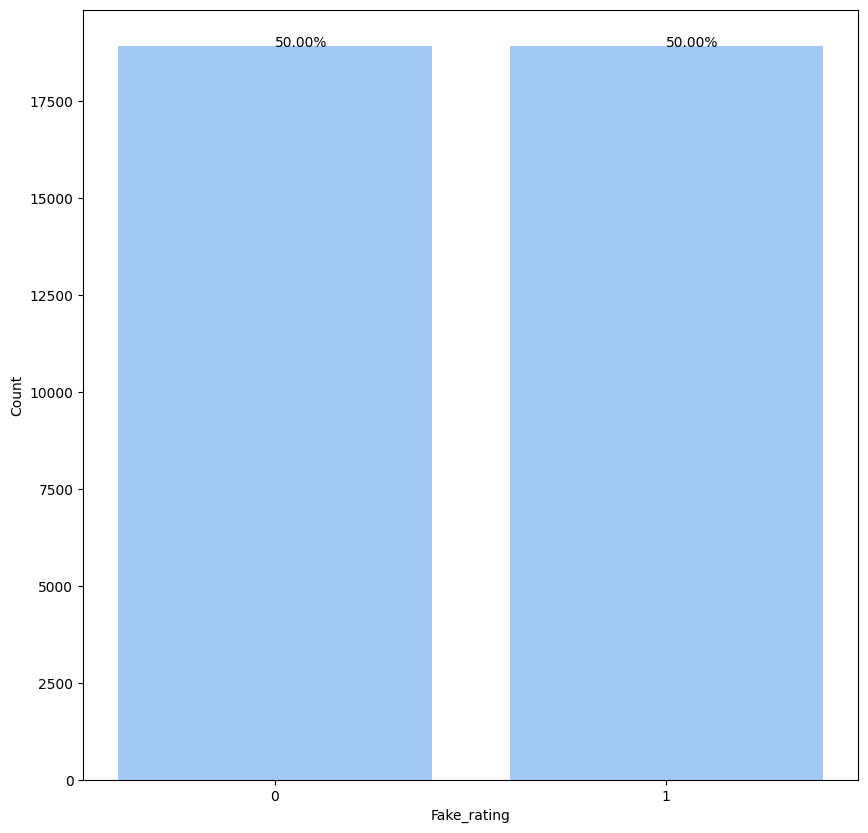

In [ ]:
plot_histogram_with_percentage(augmented_df,'Fake_rating')

In [ ]:
# Balanced Augmented Dataset into file
augmented_df.to_csv('unbiasedAugmenttedTrainData_Oversample.csv', index=False)

## Using Undersampling

In [ ]:
real_samples.shape, fake_samples.shape

((18922, 2), (15949, 2))

In [ ]:
# merge the balanced data with undersampled Real Samples
df_train_undersample = pd.concat([fake_samples, real_samples.sample(n = len(fake_samples))],axis = 0)

print(df_train_undersample.shape)

# shuffle the order of training samples
df_train_undersample = df_train_undersample.sample(frac=1).reset_index(drop=True)

print(df_train_undersample.head(5))


(31898, 2)
                                                text  Fake_rating
0  SPRINGFIELD Mo Reuters President Donald Trump ...            0
1  WASHINGTON Reuters S President Barack Obama sa...            0
2   GPD is our General Posting Department whereby...            1
3  VALLEGRANDE Bolivia Reuters Thousands gathered...            0
4  DANANG Vietnam Reuters planned meeting of lead...            0


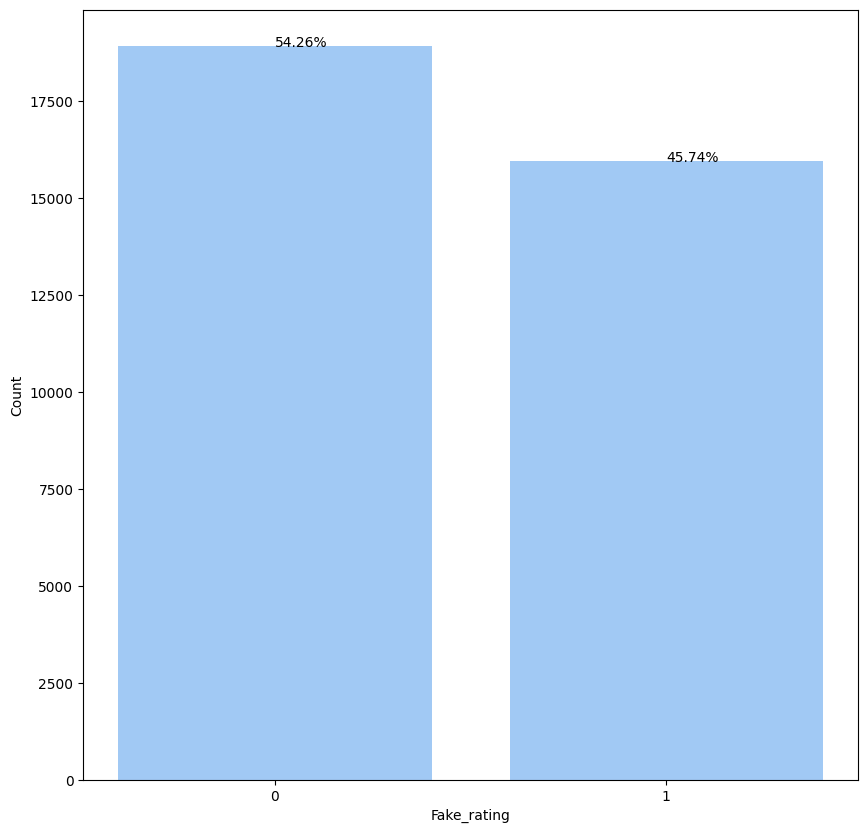

In [ ]:
plot_histogram_with_percentage(train_df,'Fake_rating')

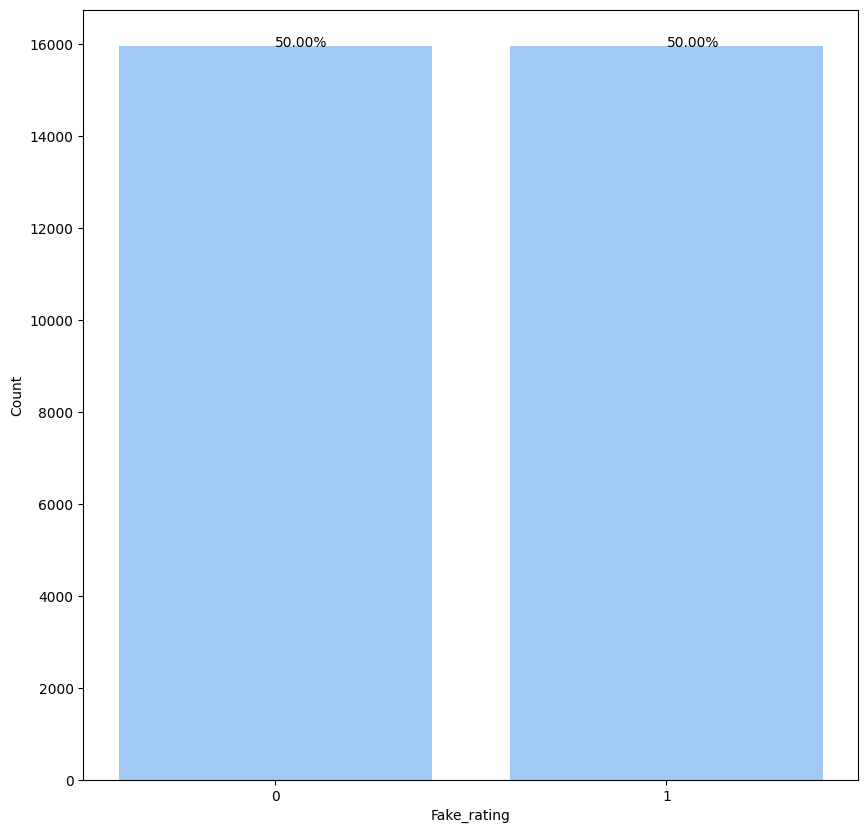

In [ ]:
plot_histogram_with_percentage(df_train_undersample,'Fake_rating')

In [ ]:
# Balanced Augmented Dataset into file
df_train_undersample.to_csv('unbiasedAugmenttedTrainData_undersample.csv', index=False)